In [356]:
import S4
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import time

In [398]:
img = np.load('epi22100_64_900_70.npy')


img = img/2 + 0.5

thick0 = 325
wavelength = 900
angle = 70

nG = 40

period = abs(wavelength/np.sin(angle/180*np.pi))

freq = 1/wavelength

Nx = np.size(img)
T = []
t = time.time()


S = S4.New(Lattice=((period,0),(0,0)), NumBasis=nG)


S.SetMaterial(Name = 'Si', Epsilon = 3.635**2)
S.SetMaterial(Name = 'glass', Epsilon = 1.45**2)
S.SetMaterial(Name = 'air', Epsilon = 1**2)
S.AddLayer(Name = 'glass', Thickness= 0, Material='glass')


S.AddLayer(Name = 'grating', Thickness= thick0, Material='air')
S.AddLayer(Name = 'air', Thickness=0, Material='air')

S.SetOptions(
 
    PolarizationDecomposition = True,


)

for i in range(np.size(img)):
    if img[i]==1:
        S.SetRegionRectangle(
                Layer = 'grating',
                Material = 'Si',
                Center = (-period/2+period/(2*Nx) + i*(period/Nx), 0),
                Angle = 0,
                Halfwidths = (period/(2*Nx), 0)
        )

S.SetExcitationPlanewave(
        IncidenceAngles=(
                0, # polar angle in [0,180)
                0  # azimuthal angle in [0,360)
        ),
        sAmplitude = 0,
        pAmplitude = 1,
        Order = 0
)
S.SetFrequency(freq)
(fi, bi) = S.GetPoyntingFlux(Layer = 'glass')
(fo, bo) = S.GetPoyntingFlux(Layer = 'air')
print(f'Efficiency: {np.real(fo/fi)}')
T.append(fo/fi)


elapsed = time.time() - t
# print(elapsed)
# plt.plot(nGs, T)
# plt.show()



Efficiency: 0.9073858344829723


In [385]:
Glist = S.GetBasisSet()
Glist

((0, 0), (1, 0), (-1, 0), (2, 0), (-2, 0))

In [ ]:
img

((0.689655172413793+0j), (-0.4418134333219778+0j))

In [325]:
x = np.linspace(-period/2, period/2,1001)
y = np.linspace(-period/2, period/2,51)
epss = np.zeros((1001,51))
for i, v in enumerate(x):
    for j, v2 in enumerate(y):
        epss[i,j] = np.real(S.GetEpsilon(v,v2,150))

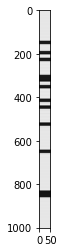

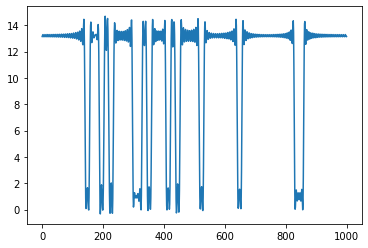

In [326]:
plt.imshow(epss, cmap=plt.cm.gray)
plt.show()
plt.plot(epss[:,0])
plt.show()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])